# Reimagined Quantum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from reimaginedQuantum import *

In [2]:
ports = findPort()
print(ports)

{'Numato Lab Mimas Spartan6 FPGA Development Board (/dev/ttyACM1)': '/dev/ttyACM1', 'FT232R USB UART (/dev/ttyUSB0)': '/dev/ttyUSB0'}


In [3]:
port = CommunicationPort('/dev/ttyUSB0')
number_detectors = 2
exp = Experiment(port, number_detectors)

In [15]:
channels = []
interval = 0.01
number_points = 50
exp.detectors[0].set_delay(20)

In [16]:
time, detectors, coins = exp.measure_N_points(channels, interval,
                                              number_points, print_ = True)

0.0 [  500000.  2000000.] [ 987654.]
0.144159555435 [  500000.  2000000.] [ 987654.]
0.293647289276 [  500000.  2000000.] [ 987654.]
0.439078569412 [  500000.  2000000.] [ 987654.]
0.588130474091 [  500000.  2000000.] [ 987654.]
0.734502792358 [  500000.  2000000.] [ 987654.]
0.878387212753 [  500000.  2000000.] [ 987654.]
1.02335429192 [  500000.  2000000.] [ 987654.]
1.17038059235 [  500000.  2000000.] [ 987654.]
1.32025074959 [  500000.  2000000.] [ 987654.]
1.47027826309 [  500000.  2000000.] [ 987654.]
1.61933755875 [  500000.  2000000.] [ 987654.]
1.7688305378 [  500000.  2000000.] [ 987654.]
1.92078256607 [  500000.  2000000.] [ 987654.]
2.07138133049 [  500000.  2000000.] [ 987654.]
2.22197508812 [  500000.  2000000.] [ 987654.]
2.37036299706 [  500000.  2000000.] [ 987654.]
2.51588153839 [  500000.  2000000.] [ 987654.]
2.66704297066 [  500000.  2000000.] [ 987654.]
2.81626701355 [  500000.  2000000.] [ 987654.]
2.96663546562 [  500000.  2000000.] [ 987654.]
3.11790418625 [  5

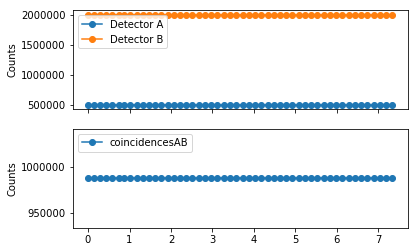

In [17]:
fig, axes = plt.subplots(2, sharex = True)

# DETECTORS
n = detectors.shape[1]
if n == 1:
    axes[0].plot(time, detectors, "-o", label = "%s"%exp.detectors[0].name)
else:
    for i in range(n):
        axes[0].plot(time, detectors[:, i], "-o", label = "%s"%exp.detectors[i].name)

# COINCIDENCES
n = coins.shape[1]
if n == 1:
    axes[1].plot(time, coins, "-o", label = "%s"%exp.coin_channels[0].prefix)
else:
    for i in range(n):
        axes[1].plot(time, detectors[:, i], "-o", label = "%s"%exp.coin_channels[i].prefix)
for ax in axes:
    ax.legend(loc = 2)
    ax.set_ylabel("Counts")

plt.show()